# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Istia Budi
- **Email:**  istiabudi@gmail.com
- **ID Dicoding:** istiabudi73

## Menentukan Pertanyaan Bisnis

- Bagaimana cuaca mempengaruhi rental sepeda?
- Bagaiamana musim mempengaruhi rental sepeda?
- Apakah jumlah peminjam sepeda meningkat dari tahun 2011 ke 2012?

## Import Semua Packages/Library yang Digunakan

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [3]:
rental_df = pd.read_csv('day.csv')
rental_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Dataset yang digunakan pada proyek ini adalah dataset bike sharing yang dapat diakses melalui kaggle. Bike sharing datasets memiliki 2 files yaitu day.csv dan hour.csv. Pada proyek kali ini peneliti hanya menggunakan file day.csv. Dataset dapat diunduh melalui: [Bike Sharing Datasets](https://www.kaggle.com/datasets/lakshmi25npathi/bike-sharing-dataset)
- Dataset ini memuat data peminjam sepeda dari rentang 01 Januari 2011 hingga 31 Desember 2012.
- Dataset memiliki 731 baris dan 16 kolom.

### Assessing Data

In [4]:
rental_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Cek missing value pada dataset

In [5]:
rental_df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


Cek duplikasi pada dataset

In [6]:

rental_df.duplicated().sum()

0

Cek parameter statistik

In [7]:
rental_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- Tidak ada missing value pada dataset
- Tidak ada duplikasi pada dataset
- Tidak ada yang aneh pada parameter statistik

### Cleaning Data

Mengubah tipe data ```dteday``` menjadi datetime



In [8]:
datetime_columns = ['dteday']

for column in datetime_columns:
  rental_df[column] = pd.to_datetime(rental_df[column])

Mengubah value ```season``` dari 1-4 menjadi Spring, Summer, Fall, Winter

In [9]:
season_mapping = {'1' : 'Spring', '2' : 'Summer', '3' : 'Fall', '4' : 'Winter'}

rental_df['season'] = rental_df['season'].astype(str)
rental_df['season'] = rental_df['season'].map(season_mapping)

Mengubah value ```weathersit``` dari 1-4 menjadi cuaca cerah dan berawan ringan, berkabut dan berawan, hujan dan salju ringan, cuaca ekstrim.

In [10]:
weather_mapping = {'1' : 'Cerah dan Berawan Ringan', '2' : 'Berkabut dan Berawan', '3' : 'Hujan dan Salju Ringan', '4' : 'Cuaca Ekstrim'}

rental_df['weathersit'] = rental_df['weathersit'].astype(str)
rental_df['weathersit'] = rental_df['weathersit'].map(weather_mapping)

Cek hasil cleaning

In [11]:
rental_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    object        
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    object        
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

**Insight:**
- Mengubah tipe data ```dteday``` menjadi datetime
- Mengubah value ```season``` dari 1-4 menjadi Spring, Summer, Fall, Winter
- Mengubah value ```weathersit``` dari 1-4 menjadi cuaca cerah dan berawan ringan, berkabut dan berawan, hujan dan salju ringan, cuaca ekstrim.

## Exploratory Data Analysis (EDA)

### Explorasi Data day.csv

In [12]:
rental_df.describe(include='all')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Fall,NaN,NaN,NaN,NaN,NaN,Cerah dan Berawan Ringan,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,188,NaN,NaN,NaN,NaN,NaN,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,2012-01-01 00:00:00,NaN,0.500684,6.519836,0.028728,2.997264,0.683995,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,NaN,0.000000,1.000000,0.000000,0.000000,0.000000,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,NaN,0.000000,4.000000,0.000000,1.000000,0.000000,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,NaN,1.000000,7.000000,0.000000,3.000000,1.000000,NaN,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,NaN,1.000000,10.000000,0.000000,5.000000,1.000000,NaN,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,NaN,1.000000,12.000000,1.000000,6.000000,1.000000,NaN,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Cek musim pemakaian sepeda terbanyak

In [13]:
rental_df.groupby(by='season').instant.nunique().sort_values(ascending=False)

,instant
season,
Fall,188
Summer,184
Spring,181
Winter,178


Cek cuaca pemakaian sepeda terbanyak

In [14]:
rental_df.groupby(by='weathersit').instant.nunique().sort_values(ascending=False)

,instant
weathersit,
Cerah dan Berawan Ringan,463
Berkabut dan Berawan,247
Hujan dan Salju Ringan,21


## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana cuaca mempengaruhi rental sepeda?

<ipython-input-29-ae92b5299f1a>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='weathersit', y='cnt', data=rental_df, palette='pastel')


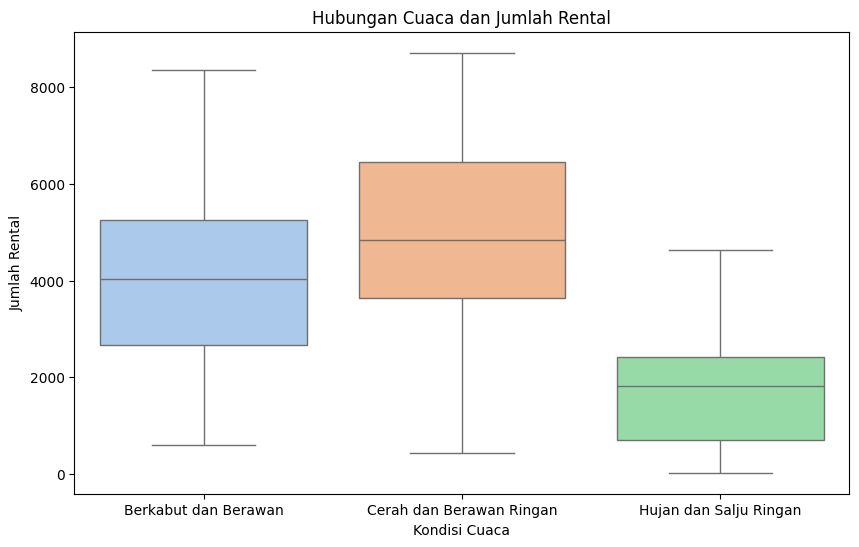

In [29]:
result = rental_df.groupby(by="weathersit").instant.nunique().sort_index().reset_index()

plt.figure(figsize=(10, 6))
sns.boxplot(x='weathersit', y='cnt', data=rental_df, palette='pastel')
plt.title("Hubungan Cuaca dan Jumlah Rental")
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Rental')
plt.xticks(result.index)
plt.show()

### Pertanyaan 2: Bagaimana musim mempengaruhi rental sepeda?

<ipython-input-30-2befecb370a2>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='season', y='cnt', data=rental_df, palette='pastel')


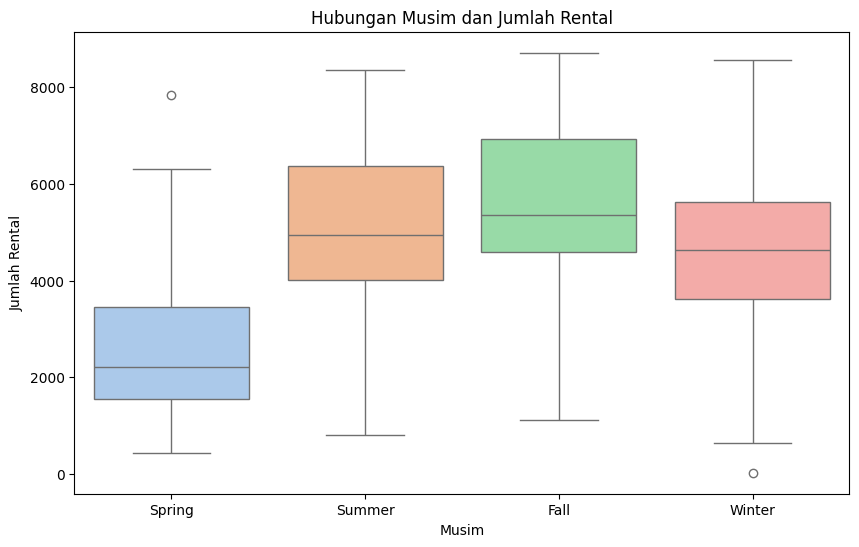

In [30]:
result = rental_df.groupby(by="season").instant.nunique().sort_index().reset_index()

plt.figure(figsize=(10, 6))
sns.boxplot(x='season', y='cnt', data=rental_df, palette='pastel')
plt.title("Hubungan Musim dan Jumlah Rental")
plt.xlabel('Musim')
plt.ylabel('Jumlah Rental')
plt.xticks(result.index)
plt.show()

### Pertanyaan 3: Apakah jumlah peminjam sepeda meningkat dari tahun 2011 ke 2012?

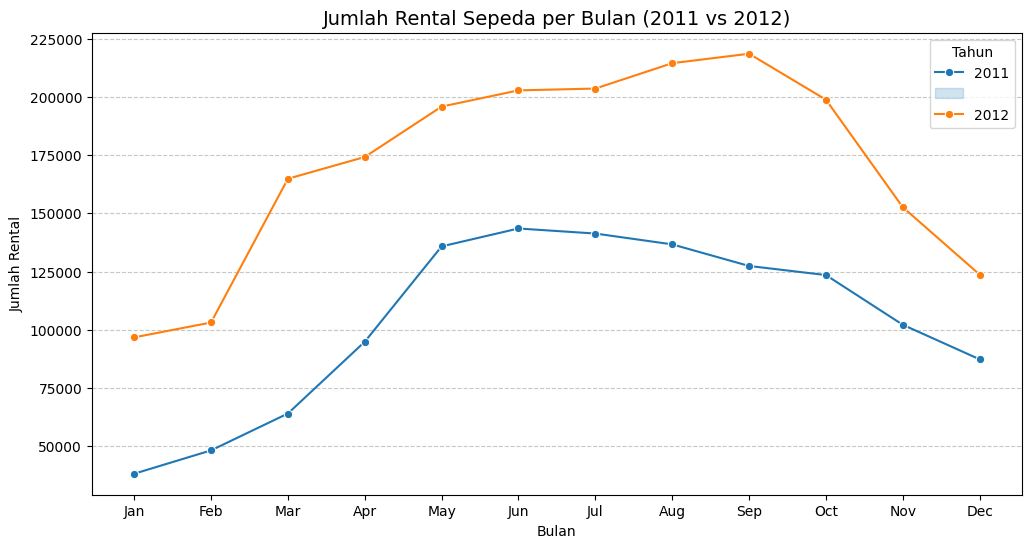

In [20]:
monthly_rentals = rental_df.groupby(['yr', 'mnth'])['cnt'].sum().reset_index()

monthly_rentals['month_label'] = monthly_rentals['mnth'].apply(
    lambda x: ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'][x - 1]
)

plt.figure(figsize=(12, 6))
sns.lineplot(x='month_label', y='cnt', hue='yr', data=monthly_rentals, marker='o')
plt.title('Jumlah Rental Sepeda per Bulan (2011 vs 2012)', fontsize=14)
plt.xlabel('Bulan')
plt.ylabel('Jumlah Rental')
plt.legend(title='Tahun', labels=['2011', '', '2012'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Conclusion

- Pengaruh Cuaca terhadap Rental Sepeda
Cuaca sangat memengaruhi jumlah penyewaan sepeda. Cuaca cerah dan berawan ringan mencatat jumlah rental tertinggi, menunjukkan bahwa kondisi yang nyaman meningkatkan minat masyarakat untuk bersepeda. Sebaliknya, kondisi berkabut dan berawan memiliki jumlah rental yang sedang, sedangkan hujan dan salju ringan mencatat jumlah rental terendah. Hal ini mengindikasikan bahwa cuaca buruk seperti hujan atau salju secara signifikan mengurangi minat pengguna untuk menyewa sepeda.

- Pengaruh Musim terhadap Rental Sepeda
Jumlah penyewaan sepeda bervariasi berdasarkan musim. Musim panas mencatat jumlah rental tertinggi karena cuaca yang hangat dan mendukung aktivitas luar ruangan, diikuti oleh musim gugur yang masih cukup nyaman untuk bersepeda. Sebaliknya, musim dingin dan musim semi memiliki jumlah rental lebih rendah, kemungkinan karena suhu dingin atau cuaca yang kurang stabil. Secara keseluruhan, aktivitas penyewaan sepeda lebih populer di musim dengan cuaca yang nyaman.

- Perbandingan Rental Sepeda Tahun 2011 dan 2012
Jumlah penyewaan sepeda secara keseluruhan meningkat dari tahun 2011 ke 2012. Peningkatan signifikan terlihat khususnya pada bulan Februari hingga Juni di tahun 2012, yang menunjukkan minat yang semakin tinggi terhadap layanan rental sepeda. Tren musiman juga tetap terlihat pada kedua tahun, dengan puncak rental terjadi pada musim panas dan penurunan pada musim dingin. Peningkatan ini dapat disebabkan oleh berbagai faktor, seperti promosi layanan, penambahan fasilitas, atau meningkatnya kesadaran akan transportasi ramah lingkungan.